# Linear, Ridge, Lasso, Elastic Net Regression

### Problem:
- Predict the temperature of the forest when it fires or not fire

In [94]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv(
    'Algerian_forest_fires_dataset.csv',
    skiprows = 1
)

data.drop(
    [122, 123, 167],
    axis=0,
    inplace=True
)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.5+ KB


## Change to numeric format

In [5]:
for col in data.columns[:6]:
    data[col] = data[col].astype(int)

In [6]:
for col in data.columns[6:13]:
    data[col] = data[col].astype(float)

In [7]:
data['Classes  '].replace(
    ['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ', 'not fire     ', 'not fire    '],
    ['not fire', 'fire', 'fire', 'fire', 'not fire', 'not fire', 'not fire', 'not fire'],
    inplace=True
)

data['Classes  '].replace(
    ['not fire', 'fire'],
    [0, 1],
    inplace=True
)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4    RH          243 non-null    int32  
 5    Ws          243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
dtypes: float64(7), int32(6), int64(1)
memory usage: 22.8 KB


## EDA

#### Check for Correlation

In [21]:
data.corr()[data.corr()>=0.65]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.676568,NaN,NaN,NaN,NaN,NaN,NaN
RH,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ws,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,NaN,NaN,NaN,0.676568,NaN,NaN,NaN,1.000000,NaN,NaN,0.740007,NaN,0.691132,0.769492
DMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.875925,0.680454,0.982248,0.875864,NaN
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875925,1.000000,NaN,0.941988,0.739521,NaN


<AxesSubplot:>

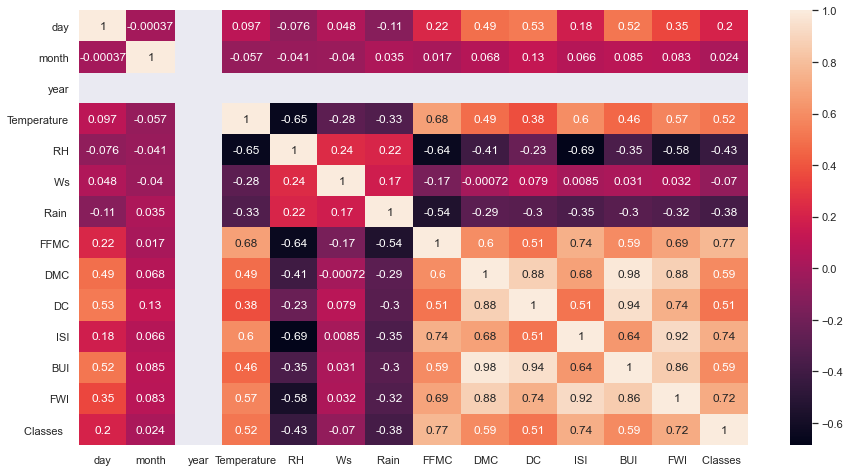

In [22]:
sns.set(
    rc={
        'figure.figsize':(15,8)
    }
)

sns.heatmap(
    data.corr(),
    annot=True
)

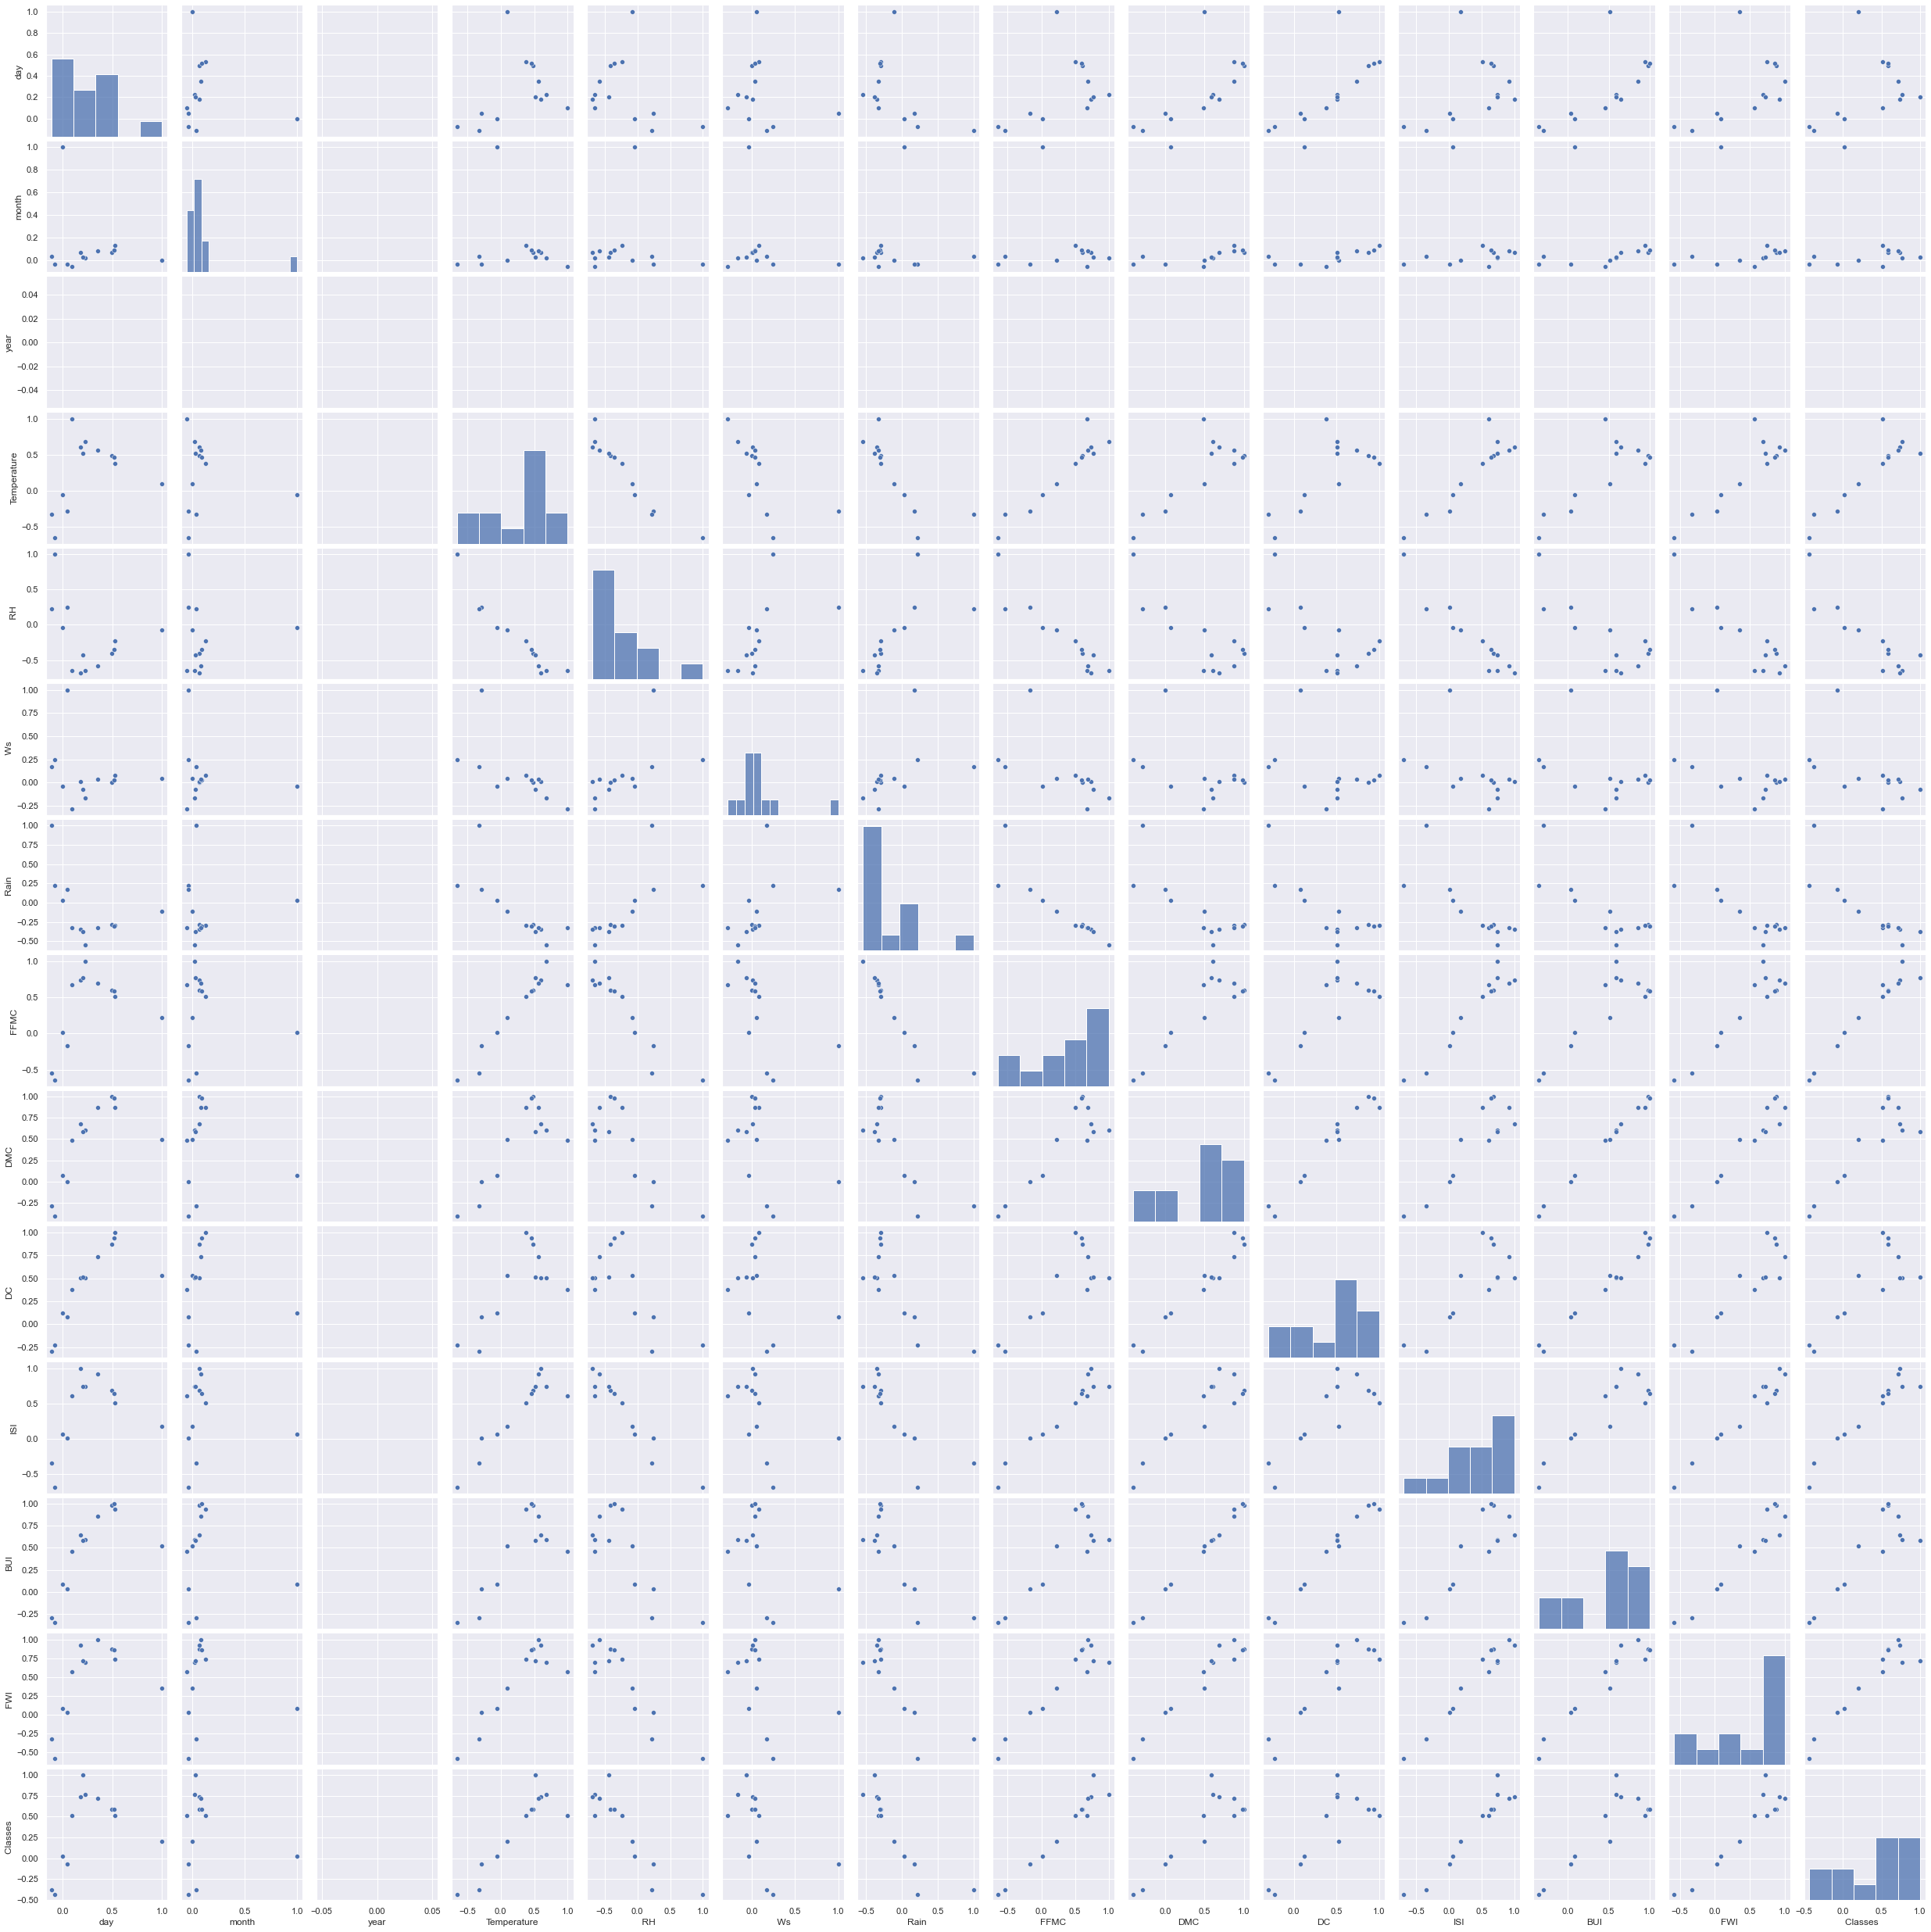

In [23]:
sns.pairplot(
    data.corr()
)

### EDA Observations

- There is no NA

#### Following are Highly correlated

- Temperature and FFMC, FFMC and ISI, 
- FFMC and FWI, FFMC and Classess, 
- DMC and DC, DMC and ISI, DMC and BUI,
- DMC and FWI, DC and BUI, DC and FWI
- ISI and FWI, ISI and Classes
- BUI and FWI, FWI and Classes 

# Distribution of data

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

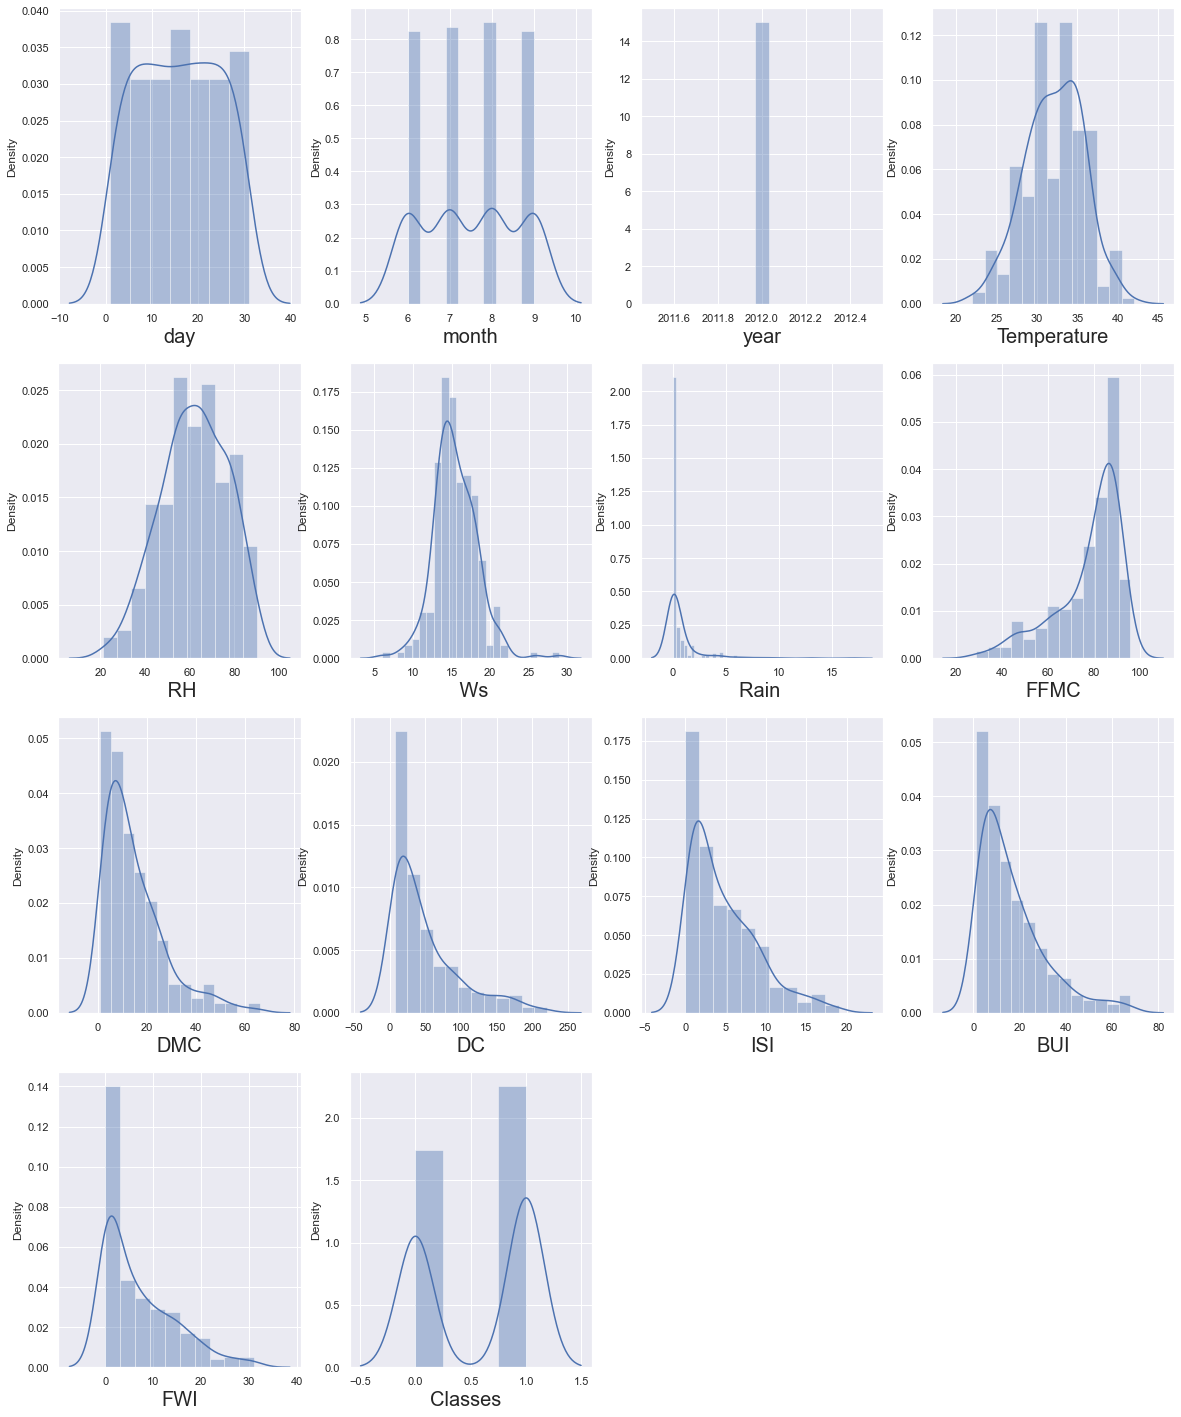

In [25]:
plt.figure(
    figsize=(20,25),
    facecolor='white'
)
plotnumber=1

for column in data:
    if plotnumber<=14 :     # as there are 14 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Remove outliers

<AxesSubplot:>

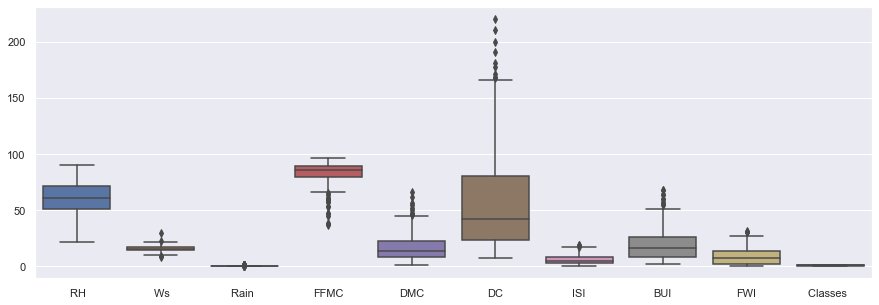

In [64]:
fig, ax = plt.subplots(
    figsize=(15, 5)
)
sns.boxplot(
    data=data.loc[:, ' RH':]
)

In [63]:
data.loc[:, ' RH':].describe()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,60.604061,15.416244,0.104061,81.994416,16.743147,57.748731,5.620812,19.152792,8.523350,0.685279
std,14.907387,2.598928,0.189208,11.053322,12.697895,47.740727,4.133848,14.461160,7.510663,0.465588
min,21.000000,8.000000,0.000000,36.100000,0.900000,7.300000,0.000000,1.400000,0.000000,0.000000
25%,51.000000,14.000000,0.000000,79.400000,7.800000,22.900000,2.200000,8.300000,2.100000,0.000000
50%,61.000000,15.000000,0.000000,85.400000,13.000000,41.500000,4.800000,15.800000,6.700000,1.000000
75%,71.000000,17.000000,0.100000,88.900000,22.500000,80.300000,8.000000,25.500000,13.200000,1.000000
max,90.000000,29.000000,0.700000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          197 non-null    int32  
 1   month        197 non-null    int32  
 2   year         197 non-null    int32  
 3   Temperature  197 non-null    int32  
 4    RH          197 non-null    int32  
 5    Ws          197 non-null    int32  
 6   Rain         197 non-null    float64
 7   FFMC         197 non-null    float64
 8   DMC          197 non-null    float64
 9   DC           197 non-null    float64
 10  ISI          197 non-null    float64
 11  BUI          197 non-null    float64
 12  FWI          197 non-null    float64
 13  Classes      197 non-null    int64  
dtypes: float64(7), int32(6), int64(1)
memory usage: 18.5 KB


In [61]:
data = data[
    data['Rain '] <= data['Rain '].quantile(0.80)
]

In [65]:
X = data.drop('Temperature', axis=1)
y = data['Temperature']

In [66]:
trainx, testx, trainy, testy = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1
)

In [67]:
scaler = StandardScaler()

trainx = scaler.fit_transform(trainx)

testx = scaler.transform(testx)

In [68]:
model = LinearRegression()

In [69]:
model.fit(trainx, trainy)

LinearRegression()

In [70]:
predY = model.predict(testx)

# Cost Function

In [71]:
mean_absolute_error(testy, predY)

2.0542537753325476

In [72]:
mean_squared_error(testy, predY)

6.934302967387293

# Performance Metrics

In [74]:
score = r2_score(testy, predY)
score

0.19209389680590772

In [76]:
#Adjusted R2

1 - (1-score)*(len(testy)-1)/(len(testy)-testx.shape[1]-1)

-0.03622739322720525

# Assumptions

Text(0, 0.5, 'Test Predicted Data')

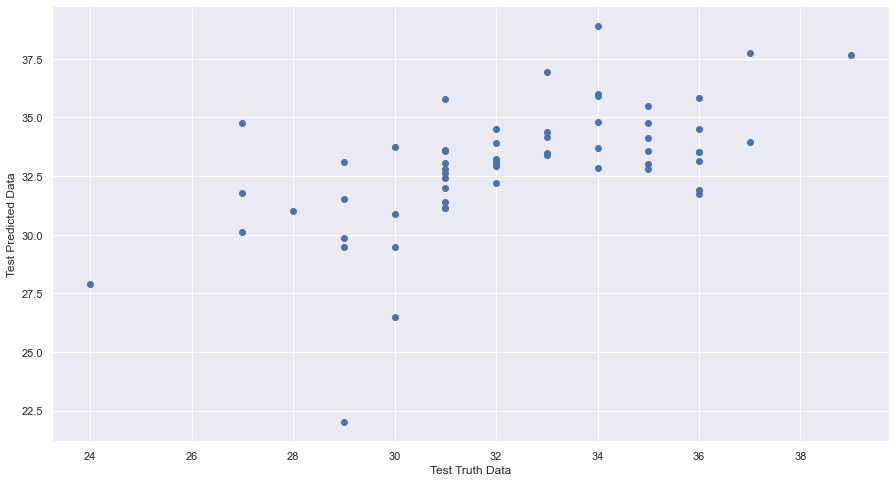

In [78]:
plt.scatter(testy,predY)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

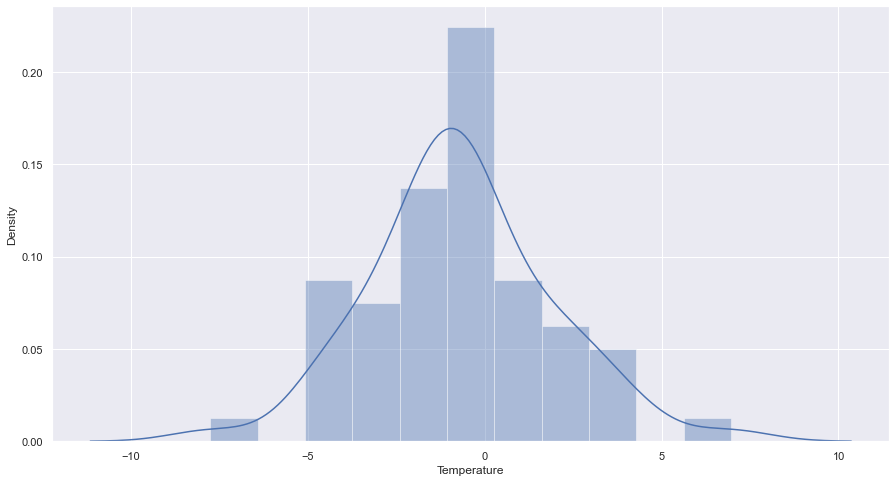

In [83]:
## residuals
residuals=testy-predY
sns.distplot(
    residuals
)

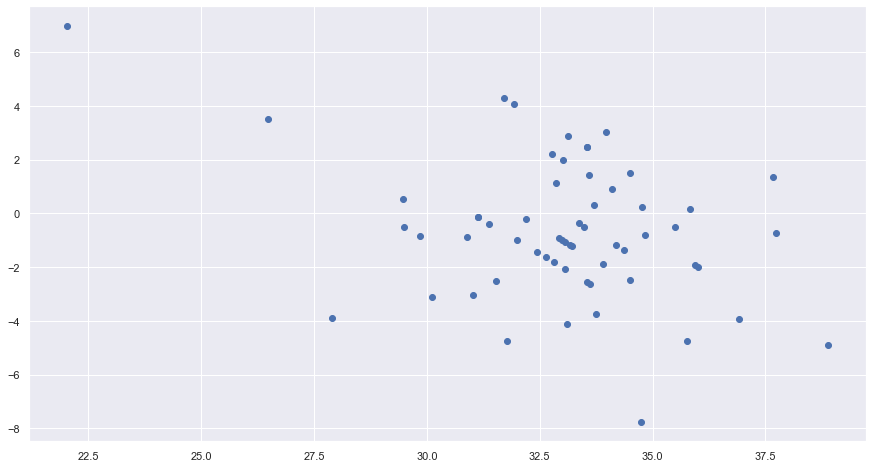

In [84]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(predY,residuals)

# Ridge

In [89]:
model = Ridge()
model.fit(trainx, trainy)
predy = model.predict(testx)

In [90]:
mean_absolute_error(
    testy,
    predy
)

2.0200056555024206

In [91]:
mean_squared_error(
    testy,
    predy
)

6.710199668876248

In [92]:
r2_score(testy, predy)

0.21820386394528957

In [93]:
1 - (1-r2_score(testy, predy))*(len(testy)-1)/(len(testy)-testx.shape[1]-1)

-0.0027385223310416595

# Lasso

In [95]:
model = Lasso()
model.fit(
    trainx,
    trainy
)
predy = model.predict(testx)

In [96]:
mean_absolute_error(
    testy,
    predy
)

2.04225159530241

In [97]:
mean_squared_error(
    testy,
    predy
)

6.834321611936345

In [98]:
r2_score(testy, predy)

0.2037425870425953

In [99]:
1 - (1-r2_score(testy, predy))*(len(testy)-1)/(len(testy)-testx.shape[1]-1)

-0.021286681836671262

# ElasticNet

In [100]:
model = ElasticNet()
model.fit(
    trainx,
    trainy
)
predy = model.predict(testx)

In [101]:
mean_absolute_error(
    testy,
    predy
)

2.0370272855758085

In [102]:
mean_squared_error(
    testy,
    predy
)

6.705468371353703

In [103]:
r2_score(testy, predy)

0.2187551009135138

In [104]:
1 - (1-r2_score(testy, predy))*(len(testy)-1)/(len(testy)-testx.shape[1]-1)

-0.002031501002232261